In [ ]:
1.人口统计分析
国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。
城市级别分布：分析主要城市的开发者密度，发现技术热点区域。
时区分布:了解用户的时区分布，分析不同地区用户的协作时间模式。

2.协作行为分析
提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。

3.其他维度有趣的洞察（至少2个）



In [ ]:
实验目标
培养数据处理与分析能力：通过实际操作，提升对大规模数据集的处理和分析能力。
掌握GPT工具的应用：学习如何利用GPT大型模型工具辅助完成数据洞察任务。
理解数据隐私与伦理：在处理包含个人信息的数据时，遵循数据隐私保护的原则和规范。
实验内容
人口统计分析
国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。
城市级别分布：分析主要城市的开发者密度，发现技术热点区域。
时区分布:了解用户的时区分布，分析不同地区用户的协作时间模式。
协作行为分析
提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。
其他维度有趣的洞察（至少2个）
提交内容
数据分析代码。
最终的数据洞察报告（PDF格式）。

文件名："C:\Users\光影PRO\Desktop\DaSE\导论\users_combined_info_500.csv"
列名：user_id	name	location	total_influence	country	event_type	event_action	event_time

国家和地区分布:
country
United States           305788
Germany                 182659
China                    73011
United Kingdom           71606
France                   59570
Canada                   58600
Netherlands              52367
Czechia                  48122
Japan                    46553
Switzerland              38093
Australia                35746
Italy                    30671
Poland                   20002
New Zealand              18444
Spain                    14939
Austria                  11758
Sweden                    9851
Finland                   8815
Denmark                   7412
Bulgaria                  7357
Hungary                   7080
Belgium                   6628
Norway                    6004
India                     5689
United Arab Emirates      5264
Singapore                 5205
Brazil                    5022
Hong Kong                 4767
Malaysia                  4538
Pakistan                  4462
Indonesia                 4248
Russia                

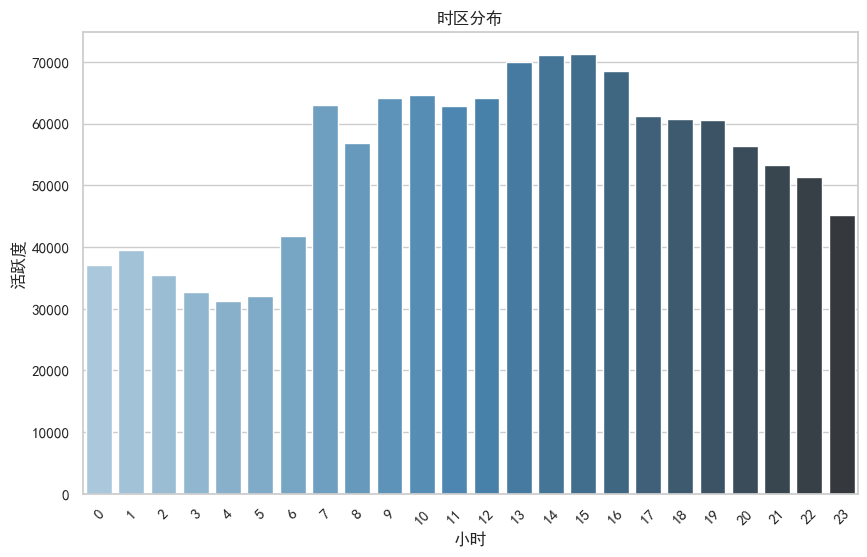

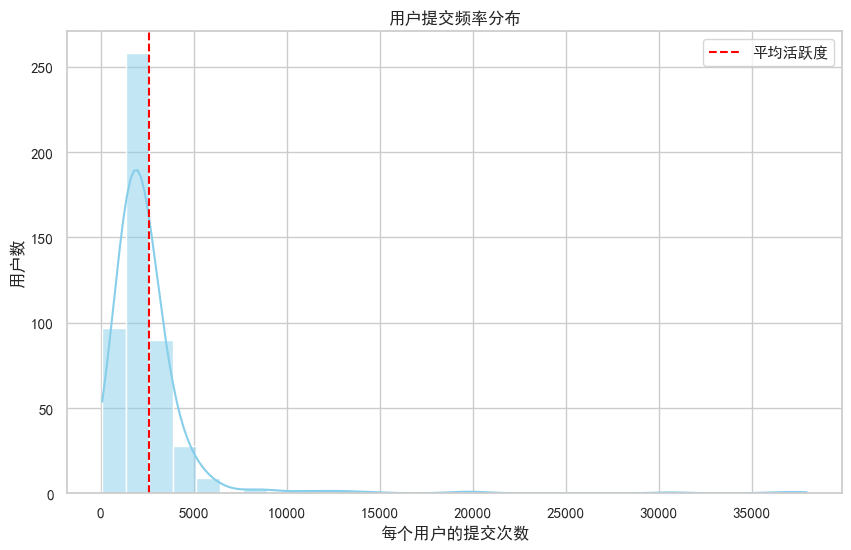

影响力最大的用户:
user_id
663432      1776.967163
2892853     1674.805908
116184      1590.152954
1309177     1580.198242
195327      1520.352173
26833433    1392.865723
7258858     1220.031738
7083755     1219.017944
91018726    1201.465759
15247171    1120.395699
Name: total_influence, dtype: float64


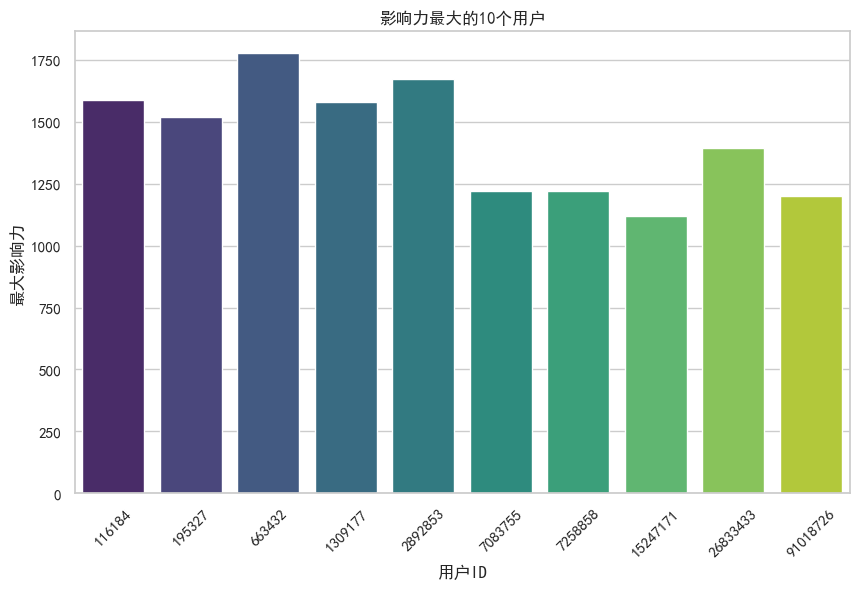

事件类型分布:
event_type
PushEvent                        410955
PullRequestEvent                 201128
IssueCommentEvent                174806
PullRequestReviewEvent           151843
CreateEvent                      104371
DeleteEvent                       96999
PullRequestReviewCommentEvent     86198
IssuesEvent                       51205
ReleaseEvent                       9455
WatchEvent                         3809
ForkEvent                          2175
CommitCommentEvent                  704
GollumEvent                         683
MemberEvent                         390
PublicEvent                          55
Name: count, dtype: int64


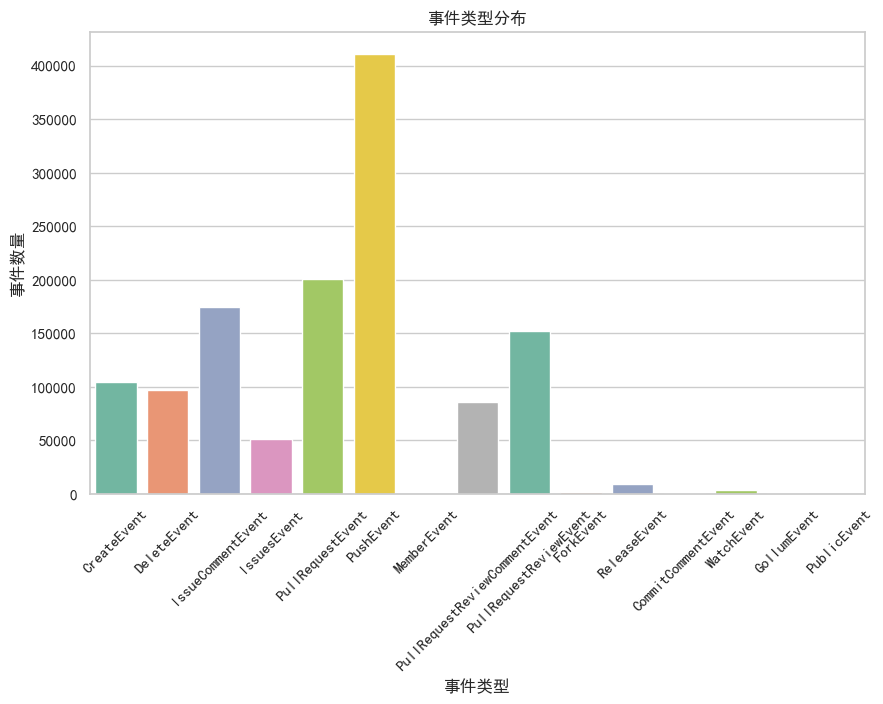

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
file_path = r"C:\Users\光影PRO\Desktop\DaSE\导论\users_combined_info_500.csv"
data = pd.read_csv(file_path)

# 数据预处理
data['event_time'] = pd.to_datetime(data['event_time'])
data['hour'] = data['event_time'].dt.hour  # 提取事件时间的小时数，方便分析时区分布

# 国家和地区分布分析
country_dist = data['country'].value_counts()
print("国家和地区分布:")
print(country_dist)

# 城市级别分布分析
city_dist = data['location'].value_counts()
print("城市分布:")
print(city_dist)

# 时区分布分析
time_zone_dist = data.groupby('hour').size() 
plt.figure(figsize=(10, 6))
sns.barplot(x=time_zone_dist.index, y=time_zone_dist.values, palette='Blues_d')
plt.title('时区分布')
plt.xlabel('小时')
plt.ylabel('活跃度')
plt.xticks(rotation=45)
plt.show()

# 提交频率分析
user_submission_count = data.groupby('user_id').size()
high_active_users = user_submission_count[user_submission_count > user_submission_count.mean()]
low_active_users = user_submission_count[user_submission_count < user_submission_count.mean()]

# 可视化高活跃和低活跃用户
plt.figure(figsize=(10, 6))
sns.histplot(user_submission_count, bins=30, kde=True, color='skyblue')
plt.axvline(user_submission_count.mean(), color='red', linestyle='--', label='平均活跃度')
plt.title('用户提交频率分布')
plt.xlabel('每个用户的提交次数')
plt.ylabel('用户数')
plt.legend()
plt.show()

# 影响力分析
influence_dist = data.groupby('user_id')['total_influence'].max()  # 用户的最大影响力
top_influencers = influence_dist.nlargest(10)  # 获取影响力最大的10个用户
print("影响力最大的用户:")
print(top_influencers)

# 绘制影响力最大的10个用户
plt.figure(figsize=(10, 6))
sns.barplot(x=top_influencers.index, y=top_influencers.values, palette='viridis')
plt.title('影响力最大的10个用户')
plt.xlabel('用户ID')
plt.ylabel('最大影响力')
plt.xticks(rotation=45)
plt.show()

# 事件类型分布
event_type_dist = data['event_type'].value_counts()
print("事件类型分布:")
print(event_type_dist)

# 绘制事件类型分布的柱状图
plt.figure(figsize=(10, 6))
sns.countplot(x='event_type', data=data, palette='Set2')
plt.title('事件类型分布')
plt.xlabel('事件类型')
plt.ylabel('事件数量')
plt.xticks(rotation=45)
plt.show()
